In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, average_precision_score, confusion_matrix
from sklearn import preprocessing
from scipy.spatial import distance
from operator import itemgetter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib
import time
from mpl_toolkits import mplot3d

In [2]:
data=pd.read_csv(r"C:\Users\Dnyanesh_SD\Desktop\Aadesh\Project\Extra\SocialNetworkAds.csv")

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# EDA

In [4]:
data.shape

(400, 5)

In [5]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [6]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# Data Preprocessing

In [8]:
data=data.drop(["User ID"],axis=1)

In [9]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [10]:
le = preprocessing.LabelEncoder()

In [11]:
data['Gender'] = le.fit_transform(data['Gender'])

In [12]:
scaler = MinMaxScaler()

In [13]:
data[['Age','EstimatedSalary']]=scaler.fit_transform(data[['Age','EstimatedSalary']])

In [14]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,0.023810,0.029630,0
1,1,0.404762,0.037037,0
2,0,0.190476,0.207407,0
3,0,0.214286,0.311111,0
4,1,0.023810,0.451852,0


In [15]:
X=data.drop('Purchased',axis=1)
y=data[["Purchased"]]

# Model Building

In [16]:
def most_common(lst):
    return max(set(lst), key=lst.count)

In [17]:
Accuracy=list()       
timeRequired=list()
#function to pass x (independent) variables, y (dependent) varibale and N (number of neighbours)
def simpleKNN(X,y,N): 
    start = time.process_time()
    global X_train,X_test,y_train,y_test, y_predicted 
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=2) #spliting data into training and testing
    columns=len(X_train.columns) #to store number of dimensions of x
    y_predicted=list()
    for index1,TestRow in X_test.iterrows(): #iterate on test set to do prediction on each row 
        TestRowTempValue=list()
        for i in range(0,columns): 
            TestRowTempValue.append(TestRow.iloc[i]) #store the row data to calculate distance
        temp=list()
        for index2,trainRow in X_train.iterrows(): #iterate over training datat to caluclate distance from each data point
            TrainRowTempValue=list()
            for i in range(0,columns):
                TrainRowTempValue.append(trainRow.iloc[i])
            distanceFromPoint=distance.euclidean(TestRowTempValue,TrainRowTempValue) #store all distace and data points
            temp.append((index1,index2,distanceFromPoint,y_train.loc[index2][0]))
            sortedDis=sorted(temp, key=itemgetter(2)) #sort based on distance calculated
            Ytop=sortedDis[:N]  #it will store nearest points
            neighbours=list()
            for i in Ytop:
                neighbours.append(i[len(i)-1])
        y_predicted.append(most_common(neighbours))
    #print("Confusion Matrix \n",confusion_matrix(y_test,y_predicted),"\n","Accuracy Score",accuracy_score(y_test,y_predicted),"\n","Precison",average_precision_score(y_test,y_predicted))
    Accuracy.append(accuracy_score(y_test,y_predicted))
    timeRequired.append((time.process_time() - start))

In [18]:
simpleKNN(X,y,15)

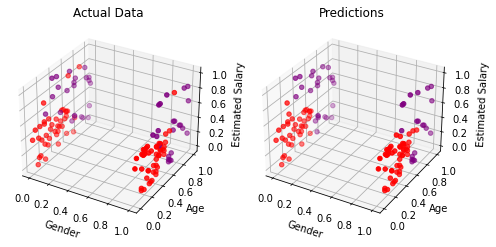

In [21]:
colors = ['red','green','blue','purple']
fig = plt.figure(figsize=plt.figaspect(0.5))
#ax = plt.axes(projection='3d')
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax1.scatter(X_test.iloc[:,0],X_test.iloc[:,1],X_test.iloc[:,2],c=y_test.iloc[:,0],cmap=matplotlib.colors.ListedColormap(colors))
ax1.set_xlabel('Gender')
ax1.set_ylabel('Age')
ax1.set_zlabel('Estimated Salary')
ax1.set_title('Actual Data')
ax2.scatter(X_test.iloc[:,0],X_test.iloc[:,1],X_test.iloc[:,2],c=y_predicted,cmap=matplotlib.colors.ListedColormap(colors))
ax2.set_xlabel('Gender')
ax2.set_ylabel('Age')
ax2.set_zlabel('Estimated Salary')
ax2.set_title('Predictions')
plt.show()

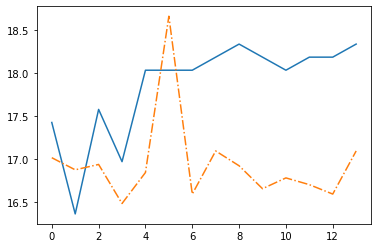

In [116]:
Accuracy=list()
timeRequired=list()
for i in range(1,15):
    simpleKNN(X,y,i)
Accuracyscaled=[element * 20 for element in Accuracy]
plt.plot(Accuracyscaled)
plt.plot(timeRequired,'-.')
plt.show()

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
X_trainSKL,X_testSKL,y_trainSKL,y_testSKL=train_test_split(X,y,test_size=0.33,random_state=2)

In [25]:
neigh = KNeighborsClassifier(n_neighbors=15)

In [26]:
neigh.fit(X_trainSKL,y_trainSKL)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=15)

In [27]:
PredictedSKL=neigh.predict(X_testSKL)

In [28]:
print("Confusion Matrix \n",confusion_matrix(y_testSKL,PredictedSKL),"\n","Accuracy Score",accuracy_score(y_testSKL,PredictedSKL),"\n","Precison",average_precision_score(y_testSKL,PredictedSKL))

Confusion Matrix 
 [[81  5]
 [ 6 40]] 
 Accuracy Score 0.9166666666666666 
 Precison 0.818401405357927
